In [3]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
country_mapping = pd.read_excel(r"C:\Users\pingk\Downloads\fadhli nitip\country_mapping.xlsx")
country_2digit = pd.read_excel(r"C:\Users\pingk\Downloads\fadhli nitip\country_2digit.xlsx")
provincial_code = pd.read_excel(r"C:\Users\pingk\Downloads\fadhli nitip\provincial code.xlsx")
three_group_precipitation = pd.read_excel(r"C:\Users\pingk\Downloads\fadhli nitip\three_group_precipitation.xlsx")
four_group_precipitation = pd.read_excel(r"C:\Users\pingk\Downloads\fadhli nitip\four_group_precipitation.xlsx")
island_mapping = pd.read_excel(r"C:\Users\pingk\Downloads\fadhli nitip\island code.xlsx")
thai_mapping = pd.read_excel(r"C:\Users\pingk\Downloads\fadhli nitip\thai_vs_nothai.xlsx")

data_rt4 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\fadhli nitip\csv\data_rt4_raw_nodrop_removedbadfiles.csv")
data_rt1 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\fadhli nitip\csv\data_rt1_raw_nodrop.csv")
data_rt3a = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\fadhli nitip\csv\data_rt3_raw_nodrop_a.csv")
data_rt3b = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\fadhli nitip\csv\data_rt3_raw_nodrop_b.csv")
data_rt6 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\fadhli nitip\csv\data_rt6_raw_nodrop.csv")
data_rt11 = pd.read_csv(r"C:\Users\pingk\Downloads\fadhli nitip\fadhli nitip\csv\data_rt11_raw_nodrop.csv")

In [4]:
# Inspect the first few rows of each dataset
print("Raw Data:")
data_rt4.head()

Raw Data:


,prov_char,country_code,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,...,3995.783,3996.265,3996.747,3997.23,3997.712,3998.194,3998.676,3999.158,3999.64,4000.122
0,BBX,1,ID,ID-BBX-068-2307-031_001,0.016094,0.016946,0.017469,0.017538,0.017089,0.016154,...,0.000476,0.000609,0.000719,0.000797,0.000843,0.000862,0.000858,0.000840,0.000813,0.000788
1,BBX,1,ID,ID-BBX-068-2307-031_002,0.013664,0.013097,0.012600,0.012208,0.011938,0.011801,...,0.000951,0.001064,0.001144,0.001182,0.001180,0.001151,0.001114,0.001086,0.001078,0.001095
2,BBX,1,ID,ID-BBX-068-2307-031_003,0.015954,0.016134,0.015986,0.015469,0.014614,0.013532,...,0.000755,0.000871,0.000928,0.000909,0.000814,0.000658,0.000470,0.000288,0.000153,0.000099
3,BBX,1,ID,ID-BBX-068-2307-031_004,0.013254,0.012653,0.011752,0.010722,0.009749,0.008982,...,0.001851,0.001925,0.001983,0.002019,0.002031,0.002017,0.001975,0.001903,0.001802,0.001685
4,BBX,1,ID,ID-BBX-068-2307-031_005,0.014003,0.013402,0.012824,0.012274,0.011728,0.011171,...,0.002461,0.002472,0.002460,0.002435,0.002404,0.002369,0.002324,0.002266,0.002196,0.002118


In [5]:
country_mapping.head()

,country_name,country_code
0,Thailand,0
1,Indonesia,1
2,Malaysia,2


In [6]:
country_2digit.head()

,country_char,country_code
0,TH,0
1,ID,1
2,MY,2


In [7]:
provincial_code.head()

,prov_char,prov_code
0,CBI,0
1,CCO,1
2,CPN,2
3,KBI,3
4,KRI,4


In [8]:
three_group_precipitation.head()

,prov_char,three_group_precip,tgp_name
0,SKM,0,Group 1
1,PKN,0,Group 1
2,CBI,0,Group 1
3,CCO,0,Group 1
4,KRI,0,Group 1


In [9]:
four_group_precipitation.head()

,prov_char,four_group_precip,fgp_name
0,SKM,0,Group 1
1,PKN,0,Group 1
2,CBI,0,Group 1
3,CCO,0,Group 1
4,KRI,0,Group 1


In [10]:
country_mapping.head()

,country_name,country_code
0,Thailand,0
1,Indonesia,1
2,Malaysia,2


In [11]:
thai_mapping.head()

,country_char,th_vs_noth,thnoth_name
0,TH,0,Thai
1,ID,1,Non-Thai
2,MY,1,Non-Thai


In [12]:
# Merge data_rt4 with provincial_code on 'prov_char'
data_rt4_with_prov_code = pd.merge(data_rt4, provincial_code, how='left', left_on='prov_char', right_on='prov_char')

# Merge the result with three_group_precipitation
data_rt4_with_3precip = pd.merge(data_rt4_with_prov_code, three_group_precipitation, how='left', left_on='prov_char', right_on='prov_char')

# Merge the result with four_group_precipitation
data_rt4_with_3p4p = pd.merge(data_rt4_with_3precip, four_group_precipitation, how='left', left_on='prov_char', right_on='prov_char')

# Merge the result with country_mapping
data_rt4_with_countryname = pd.merge(data_rt4_with_3p4p, country_mapping, how='left', left_on='country_code', right_on='country_code')

# Merge the result with thai_mapping
data_rt4_with_thai = pd.merge(data_rt4_with_countryname, thai_mapping, how='left', left_on='country_char', right_on='country_char')

In [13]:
data_rt4_with_prov_code.head()

,prov_char,country_code,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,...,3996.265,3996.747,3997.23,3997.712,3998.194,3998.676,3999.158,3999.64,4000.122,prov_code
0,BBX,1,ID,ID-BBX-068-2307-031_001,0.016094,0.016946,0.017469,0.017538,0.017089,0.016154,...,0.000609,0.000719,0.000797,0.000843,0.000862,0.000858,0.000840,0.000813,0.000788,17
1,BBX,1,ID,ID-BBX-068-2307-031_002,0.013664,0.013097,0.012600,0.012208,0.011938,0.011801,...,0.001064,0.001144,0.001182,0.001180,0.001151,0.001114,0.001086,0.001078,0.001095,17
2,BBX,1,ID,ID-BBX-068-2307-031_003,0.015954,0.016134,0.015986,0.015469,0.014614,0.013532,...,0.000871,0.000928,0.000909,0.000814,0.000658,0.000470,0.000288,0.000153,0.000099,17
3,BBX,1,ID,ID-BBX-068-2307-031_004,0.013254,0.012653,0.011752,0.010722,0.009749,0.008982,...,0.001925,0.001983,0.002019,0.002031,0.002017,0.001975,0.001903,0.001802,0.001685,17
4,BBX,1,ID,ID-BBX-068-2307-031_005,0.014003,0.013402,0.012824,0.012274,0.011728,0.011171,...,0.002472,0.002460,0.002435,0.002404,0.002369,0.002324,0.002266,0.002196,0.002118,17


In [14]:
data_rt4_with_3precip.head()

,prov_char,country_code,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,...,3997.23,3997.712,3998.194,3998.676,3999.158,3999.64,4000.122,prov_code,three_group_precip,tgp_name
0,BBX,1,ID,ID-BBX-068-2307-031_001,0.016094,0.016946,0.017469,0.017538,0.017089,0.016154,...,0.000797,0.000843,0.000862,0.000858,0.000840,0.000813,0.000788,17,2,Group 3
1,BBX,1,ID,ID-BBX-068-2307-031_002,0.013664,0.013097,0.012600,0.012208,0.011938,0.011801,...,0.001182,0.001180,0.001151,0.001114,0.001086,0.001078,0.001095,17,2,Group 3
2,BBX,1,ID,ID-BBX-068-2307-031_003,0.015954,0.016134,0.015986,0.015469,0.014614,0.013532,...,0.000909,0.000814,0.000658,0.000470,0.000288,0.000153,0.000099,17,2,Group 3
3,BBX,1,ID,ID-BBX-068-2307-031_004,0.013254,0.012653,0.011752,0.010722,0.009749,0.008982,...,0.002019,0.002031,0.002017,0.001975,0.001903,0.001802,0.001685,17,2,Group 3
4,BBX,1,ID,ID-BBX-068-2307-031_005,0.014003,0.013402,0.012824,0.012274,0.011728,0.011171,...,0.002435,0.002404,0.002369,0.002324,0.002266,0.002196,0.002118,17,2,Group 3


In [15]:
data_rt4_with_3p4p.head()

,prov_char,country_code,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,...,3998.194,3998.676,3999.158,3999.64,4000.122,prov_code,three_group_precip,tgp_name,four_group_precip,fgp_name
0,BBX,1,ID,ID-BBX-068-2307-031_001,0.016094,0.016946,0.017469,0.017538,0.017089,0.016154,...,0.000862,0.000858,0.000840,0.000813,0.000788,17,2,Group 3,2,Group 3
1,BBX,1,ID,ID-BBX-068-2307-031_002,0.013664,0.013097,0.012600,0.012208,0.011938,0.011801,...,0.001151,0.001114,0.001086,0.001078,0.001095,17,2,Group 3,2,Group 3
2,BBX,1,ID,ID-BBX-068-2307-031_003,0.015954,0.016134,0.015986,0.015469,0.014614,0.013532,...,0.000658,0.000470,0.000288,0.000153,0.000099,17,2,Group 3,2,Group 3
3,BBX,1,ID,ID-BBX-068-2307-031_004,0.013254,0.012653,0.011752,0.010722,0.009749,0.008982,...,0.002017,0.001975,0.001903,0.001802,0.001685,17,2,Group 3,2,Group 3
4,BBX,1,ID,ID-BBX-068-2307-031_005,0.014003,0.013402,0.012824,0.012274,0.011728,0.011171,...,0.002369,0.002324,0.002266,0.002196,0.002118,17,2,Group 3,2,Group 3


In [16]:
data_rt4_with_countryname.head()

,prov_char,country_code,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,...,3998.676,3999.158,3999.64,4000.122,prov_code,three_group_precip,tgp_name,four_group_precip,fgp_name,country_name
0,BBX,1,ID,ID-BBX-068-2307-031_001,0.016094,0.016946,0.017469,0.017538,0.017089,0.016154,...,0.000858,0.000840,0.000813,0.000788,17,2,Group 3,2,Group 3,Indonesia
1,BBX,1,ID,ID-BBX-068-2307-031_002,0.013664,0.013097,0.012600,0.012208,0.011938,0.011801,...,0.001114,0.001086,0.001078,0.001095,17,2,Group 3,2,Group 3,Indonesia
2,BBX,1,ID,ID-BBX-068-2307-031_003,0.015954,0.016134,0.015986,0.015469,0.014614,0.013532,...,0.000470,0.000288,0.000153,0.000099,17,2,Group 3,2,Group 3,Indonesia
3,BBX,1,ID,ID-BBX-068-2307-031_004,0.013254,0.012653,0.011752,0.010722,0.009749,0.008982,...,0.001975,0.001903,0.001802,0.001685,17,2,Group 3,2,Group 3,Indonesia
4,BBX,1,ID,ID-BBX-068-2307-031_005,0.014003,0.013402,0.012824,0.012274,0.011728,0.011171,...,0.002324,0.002266,0.002196,0.002118,17,2,Group 3,2,Group 3,Indonesia


In [17]:
data_rt4_with_thai.head()

,prov_char,country_code,country_char,wavenumber,649.893,650.376,650.858,651.34,651.822,652.304,...,3999.64,4000.122,prov_code,three_group_precip,tgp_name,four_group_precip,fgp_name,country_name,th_vs_noth,thnoth_name
0,BBX,1,ID,ID-BBX-068-2307-031_001,0.016094,0.016946,0.017469,0.017538,0.017089,0.016154,...,0.000813,0.000788,17,2,Group 3,2,Group 3,Indonesia,1,Non-Thai
1,BBX,1,ID,ID-BBX-068-2307-031_002,0.013664,0.013097,0.012600,0.012208,0.011938,0.011801,...,0.001078,0.001095,17,2,Group 3,2,Group 3,Indonesia,1,Non-Thai
2,BBX,1,ID,ID-BBX-068-2307-031_003,0.015954,0.016134,0.015986,0.015469,0.014614,0.013532,...,0.000153,0.000099,17,2,Group 3,2,Group 3,Indonesia,1,Non-Thai
3,BBX,1,ID,ID-BBX-068-2307-031_004,0.013254,0.012653,0.011752,0.010722,0.009749,0.008982,...,0.001802,0.001685,17,2,Group 3,2,Group 3,Indonesia,1,Non-Thai
4,BBX,1,ID,ID-BBX-068-2307-031_005,0.014003,0.013402,0.012824,0.012274,0.011728,0.011171,...,0.002196,0.002118,17,2,Group 3,2,Group 3,Indonesia,1,Non-Thai


In [18]:
print(data_rt4_with_3p4p.isna().sum())

prov_char             0
country_code          0
country_char          0
wavenumber            0
649.893               0
                     ..
prov_code             0
three_group_precip    0
tgp_name              0
four_group_precip     0
fgp_name              0
Length: 6959, dtype: int64


In [19]:
ftir_data_rt4 = data_rt4_with_3p4p.iloc[:, 4:-5]
ftir_data_rt4.head()

,649.893,650.376,650.858,651.34,651.822,652.304,652.786,653.268,653.75,654.232,...,3995.783,3996.265,3996.747,3997.23,3997.712,3998.194,3998.676,3999.158,3999.64,4000.122
0,0.016094,0.016946,0.017469,0.017538,0.017089,0.016154,0.014849,0.013370,0.011951,0.010798,...,0.000476,0.000609,0.000719,0.000797,0.000843,0.000862,0.000858,0.000840,0.000813,0.000788
1,0.013664,0.013097,0.012600,0.012208,0.011938,0.011801,0.011799,0.011914,0.012086,0.012223,...,0.000951,0.001064,0.001144,0.001182,0.001180,0.001151,0.001114,0.001086,0.001078,0.001095
2,0.015954,0.016134,0.015986,0.015469,0.014614,0.013532,0.012372,0.011307,0.010487,0.010014,...,0.000755,0.000871,0.000928,0.000909,0.000814,0.000658,0.000470,0.000288,0.000153,0.000099
3,0.013254,0.012653,0.011752,0.010722,0.009749,0.008982,0.008484,0.008240,0.008177,0.008214,...,0.001851,0.001925,0.001983,0.002019,0.002031,0.002017,0.001975,0.001903,0.001802,0.001685
4,0.014003,0.013402,0.012824,0.012274,0.011728,0.011171,0.010621,0.010143,0.009831,0.009767,...,0.002461,0.002472,0.002460,0.002435,0.002404,0.002369,0.002324,0.002266,0.002196,0.002118


In [20]:
# Define the ranges to check
ranges = [
    (3100, 4001),
    (1870, 2700)
]

# Convert column names to numeric where possible
def try_convert_to_float(col_name):
    try:
        return float(col_name)
    except ValueError:
        return col_name

numeric_columns = [try_convert_to_float(col) for col in ftir_data_rt4.columns]

# Create a new DataFrame with converted column names
ftir_data_rt4.columns = numeric_columns

# Function to check if a column name falls within any of the specified ranges
def column_in_ranges(col_name, ranges):
    if isinstance(col_name, float):
        for lower, upper in ranges:
            if lower <= col_name <= upper:
                return True
    return False

# Identify columns to drop based on the specified ranges
columns_to_drop = [col for col in ftir_data_rt4.columns if column_in_ranges(col, ranges)]

# Drop the identified columns
ftir_data_rt4_cleaned = ftir_data_rt4.drop(columns=columns_to_drop)

ftir_data_rt4_cleaned.head()

# Save the cleaned DataFrame to a new CSV file
#ftir_data_rt4_cleaned_file_path = '/mnt/data/ftir_data_rt4_cleaned.csv'
#ftir_data_rt4_cleaned.to_csv(cleaned_file_path, index=False)

ftir_data_rt4_cleaned

,649.893,650.376,650.858,651.340,651.822,652.304,652.786,653.268,653.750,654.232,...,3095.189,3095.671,3096.154,3096.636,3097.118,3097.600,3098.082,3098.564,3099.046,3099.528
0,0.016094,0.016946,0.017469,0.017538,0.017089,0.016154,0.014849,0.013370,0.011951,0.010798,...,0.002089,0.002042,0.002030,0.002054,0.002106,0.002176,0.002251,0.002327,0.002400,0.002471
1,0.013664,0.013097,0.012600,0.012208,0.011938,0.011801,0.011799,0.011914,0.012086,0.012223,...,0.002490,0.002526,0.002579,0.002646,0.002721,0.002796,0.002861,0.002909,0.002932,0.002932
2,0.015954,0.016134,0.015986,0.015469,0.014614,0.013532,0.012372,0.011307,0.010487,0.010014,...,0.001440,0.001451,0.001487,0.001537,0.001589,0.001634,0.001666,0.001680,0.001675,0.001651
3,0.013254,0.012653,0.011752,0.010722,0.009749,0.008982,0.008484,0.008240,0.008177,0.008214,...,0.003409,0.003488,0.003543,0.003569,0.003571,0.003555,0.003524,0.003485,0.003437,0.003385
4,0.014003,0.013402,0.012824,0.012274,0.011728,0.011171,0.010621,0.010143,0.009831,0.009767,...,0.002296,0.002352,0.002439,0.002539,0.002632,0.002706,0.002755,0.002776,0.002775,0.002765
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432,0.012609,0.012128,0.011822,0.011794,0.012111,0.012778,0.013739,0.014886,0.016084,0.017212,...,0.011703,0.011872,0.012038,0.012171,0.012250,0.012263,0.012215,0.012119,0.011993,0.011857
433,0.014162,0.014071,0.014099,0.014314,0.014771,0.015495,0.016470,0.017634,0.018876,0.020060,...,0.013766,0.013999,0.014230,0.014438,0.014602,0.014705,0.014733,0.014679,0.014544,0.014341
434,0.012689,0.012621,0.012210,0.011603,0.010994,0.010581,0.010496,0.010790,0.011409,0.012228,...,0.002766,0.002733,0.002694,0.002654,0.002619,0.002597,0.002594,0.002612,0.002650,0.002703
435,0.013717,0.013979,0.014267,0.014573,0.014852,0.015038,0.015085,0.014971,0.014710,0.014338,...,0.002610,0.002648,0.002647,0.002601,0.002514,0.002403,0.002289,0.002196,0.002140,0.002131


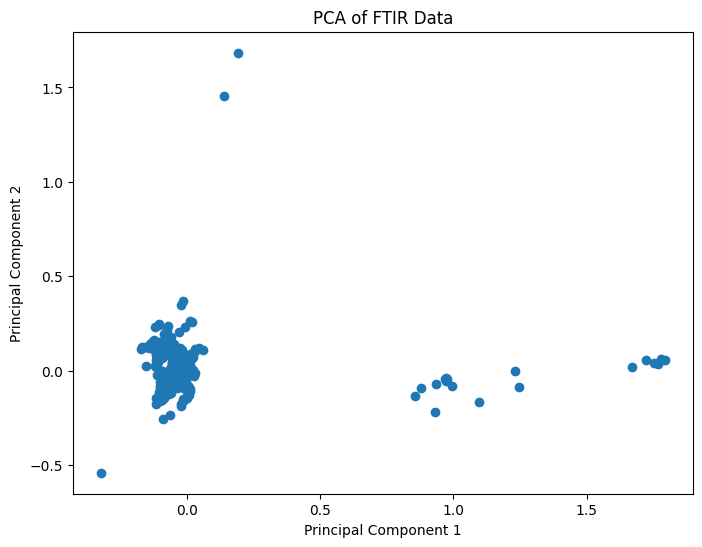

Explained Variance Ratio: [0.62078314 0.17396499 0.1225705  0.03154733 0.01455208]


In [21]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt



# Perform PCA
def perform_pca(df, n_components=5):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(df)
    return principal_components, pca

# Apply PCA on ftir_data_rt4_cleaned
principal_components, pca_model = perform_pca(ftir_data_rt4_cleaned)

# Create a DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Save the PCA results
#principal_df.to_csv('path/to/your/principal_components.csv', index=False)

# Plot the PCA results
plt.figure(figsize=(8,6))
plt.scatter(principal_df['PC1'], principal_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data')
plt.show()

# Optional: Print explained variance ratio
print("Explained Variance Ratio:", pca_model.explained_variance_ratio_)


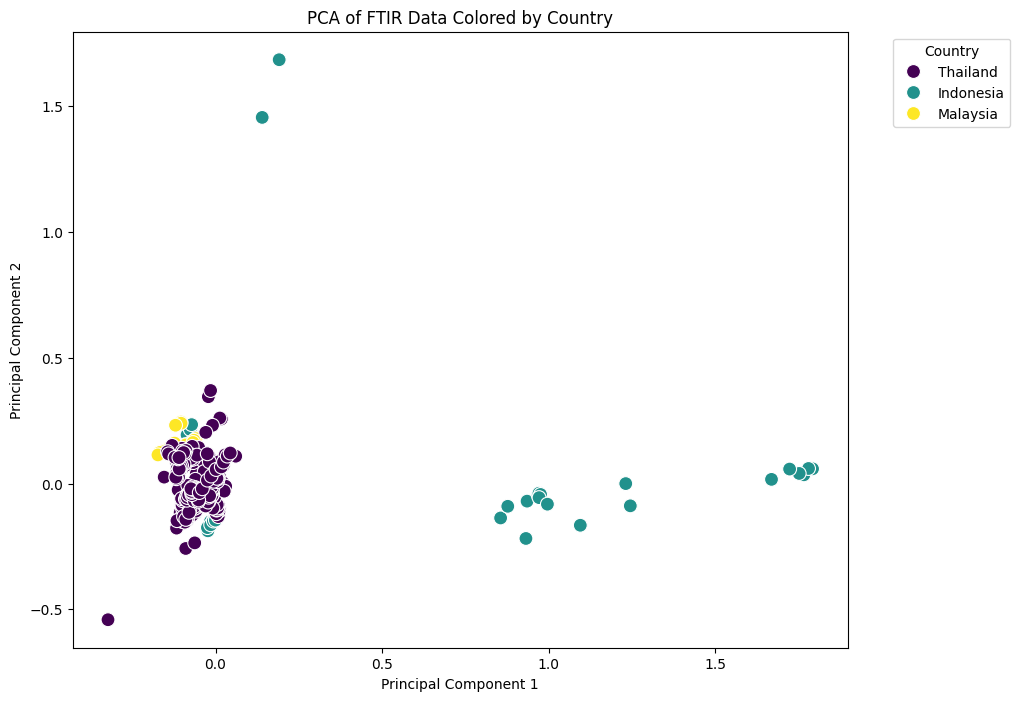

Explained Variance Ratio: [0.62078314 0.17396499]


In [22]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Perform PCA
def perform_pca(df, n_components=2):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(df)
    return principal_components, pca

# Apply PCA on ftir_data_rt4_cleaned
principal_components, pca_model = perform_pca(ftir_data_rt4_cleaned)

# Create a DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Merge the principal components DataFrame with the country information
merged_df = pd.concat([principal_df, data_rt4_with_thai[['country_code', 'country_name']]], axis=1)

# Save the PCA results
#merged_df.to_csv('path/to/your/principal_components_with_country.csv', index=False)

# Plot the PCA results with colors based on country_code
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_df, x='PC1', y='PC2', hue='country_code', palette='viridis', s=100)

# Customize the legend to show country names instead of codes
handles, labels = plt.gca().get_legend_handles_labels()
country_code_to_name = dict(zip(merged_df['country_code'], merged_df['country_name']))
updated_labels = [country_code_to_name[int(label)] if label.isdigit() else label for label in labels]
plt.legend(handles, updated_labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data Colored by Country')
plt.show()

# Optional: Print explained variance ratio
print("Explained Variance Ratio:", pca_model.explained_variance_ratio_)


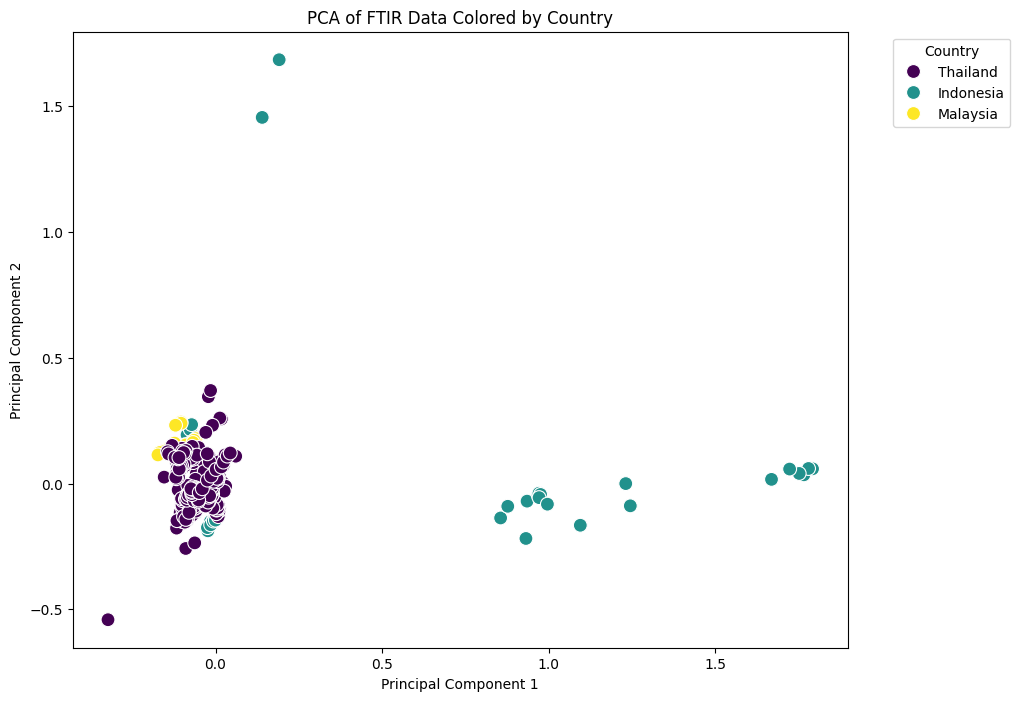

Explained Variance Ratio: [0.62078314 0.17396499]


In [23]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Function to perform PCA
def perform_pca(df, n_components=2):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(df)
    return principal_components, pca

# Apply PCA on ftir_data_rt4_cleaned
principal_components, pca_model = perform_pca(ftir_data_rt4_cleaned)

# Create a DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Assuming the datasets are loaded or already available in the environment
# data_rt4_with_thai = pd.read_csv('path/to/your/data_rt4_with_thai.csv')

# Merge the principal components DataFrame with the country information
merged_df = pd.concat([principal_df, data_rt4_with_thai[['country_code', 'country_name']]], axis=1)



# Plot the PCA results with colors based on country_code
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_df, x='PC1', y='PC2', hue='country_code', palette='viridis', s=100)

# Customize the legend to show country names instead of codes
handles, labels = plt.gca().get_legend_handles_labels()
country_code_to_name = dict(zip(merged_df['country_code'], merged_df['country_name']))
updated_labels = [country_code_to_name[int(label)] if label.isdigit() else label for label in labels]
plt.legend(handles, updated_labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data Colored by Country')
plt.show()

# Optional: Print explained variance ratio
print("Explained Variance Ratio:", pca_model.explained_variance_ratio_)


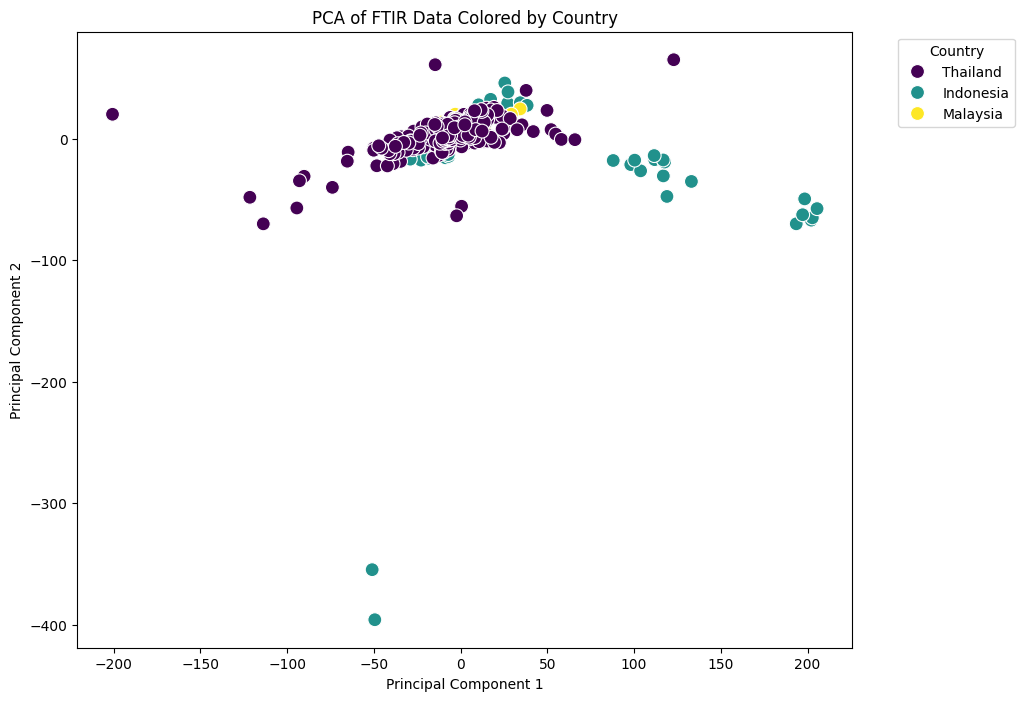

Explained Variance Ratio: [0.43707497 0.26787673]


In [24]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess the data
def preprocess_data(df):
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Scale the data
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_imputed), columns=df.columns)
    
    return df_scaled

# Function to perform PCA
def perform_pca(df, n_components=2):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(df)
    return principal_components, pca

# Preprocess the data
ftir_data_rt4_preprocessed = preprocess_data(ftir_data_rt4_cleaned)

# Apply PCA on preprocessed data
principal_components, pca_model = perform_pca(ftir_data_rt4_preprocessed)

# Create a DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Merge the principal components DataFrame with the country information
merged_df = pd.concat([principal_df, data_rt4_with_thai[['country_code', 'country_name']]], axis=1)

# Save the PCA results
#merged_df.to_csv('path/to/your/principal_components_with_country.csv', index=False)

# Plot the PCA results with colors based on country_code
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_df, x='PC1', y='PC2', hue='country_code', palette='viridis', s=100)

# Customize the legend to show country names instead of codes
handles, labels = plt.gca().get_legend_handles_labels()
country_code_to_name = dict(zip(merged_df['country_code'], merged_df['country_name']))
updated_labels = [country_code_to_name[int(label)] if label.isdigit() else label for label in labels]
plt.legend(handles, updated_labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data Colored by Country')
plt.show()

# Optional: Print explained variance ratio
print("Explained Variance Ratio:", pca_model.explained_variance_ratio_)


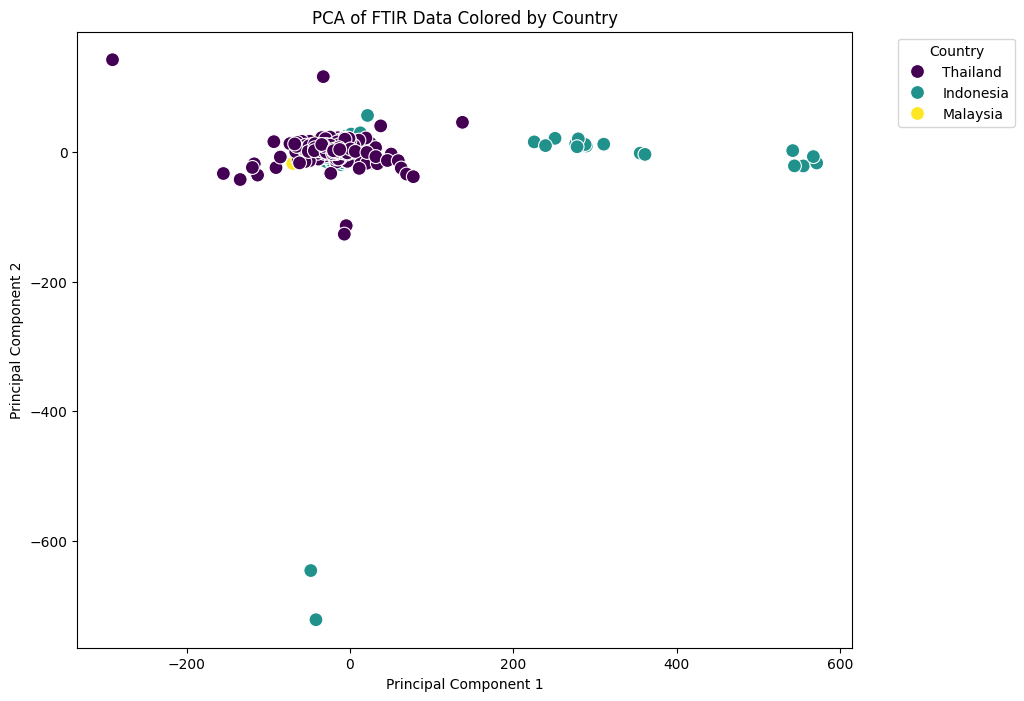

Explained Variance Ratio: [0.62238615 0.19646376]


In [25]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess the data
def preprocess_data(df):
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Log transform the data to reduce skewness
    df_log_transformed = np.log1p(df_imputed)
    
    # Scale the data using RobustScaler
    scaler = RobustScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_log_transformed), columns=df.columns)
    
    return df_scaled

# Function to perform PCA
def perform_pca(df, n_components=2):
    pca = PCA(n_components=n_components)
    principal_components = pca.fit_transform(df)
    return principal_components, pca

# Preprocess the data
ftir_data_rt4_preprocessed = preprocess_data(ftir_data_rt4_cleaned)

# Apply PCA on preprocessed data
principal_components, pca_model = perform_pca(ftir_data_rt4_preprocessed)

# Create a DataFrame with principal components
principal_df = pd.DataFrame(data=principal_components, columns=[f'PC{i+1}' for i in range(principal_components.shape[1])])

# Merge the principal components DataFrame with the country information
merged_df = pd.concat([principal_df, data_rt4_with_thai[['country_code', 'country_name']]], axis=1)

# Save the PCA results
#merged_df.to_csv('path/to/your/principal_components_with_country.csv', index=False)

# Plot the PCA results with colors based on country_code
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_df, x='PC1', y='PC2', hue='country_code', palette='viridis', s=100)

# Customize the legend to show country names instead of codes
handles, labels = plt.gca().get_legend_handles_labels()
country_code_to_name = dict(zip(merged_df['country_code'], merged_df['country_name']))
updated_labels = [country_code_to_name[int(label)] if label.isdigit() else label for label in labels]
plt.legend(handles, updated_labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data Colored by Country')
plt.show()

# Optional: Print explained variance ratio
print("Explained Variance Ratio:", pca_model.explained_variance_ratio_)


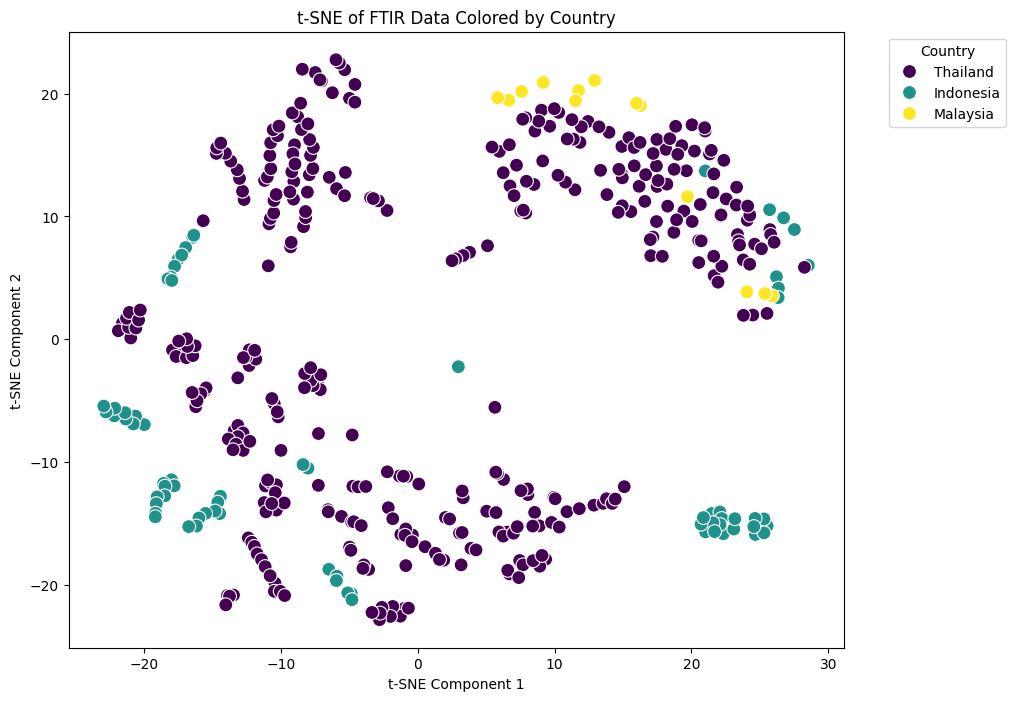

Explained Variance Ratio of PCA: [6.22386150e-01 1.96463759e-01 1.00596183e-01 2.99199458e-02
 7.64106079e-03 6.53786773e-03 3.56440751e-03 2.76771085e-03
 1.35018594e-03 1.19979278e-03 1.12912343e-03 9.49295953e-04
 8.91283932e-04 7.36512259e-04 6.85915224e-04 6.26261635e-04
 6.19600954e-04 5.93350899e-04 5.50146150e-04 5.33760462e-04
 5.11723987e-04 5.01941389e-04 4.87275896e-04 4.84369942e-04
 4.62203361e-04 4.38056239e-04 4.14139061e-04 4.00136870e-04
 3.87063033e-04 3.75438363e-04 3.58508932e-04 3.46732788e-04
 3.26804171e-04 3.08293841e-04 3.02016884e-04 2.94465409e-04
 2.83794736e-04 2.78136213e-04 2.71816637e-04 2.59200996e-04
 2.53060783e-04 2.46857701e-04 2.37999508e-04 2.31255195e-04
 2.28093944e-04 2.16525959e-04 2.09608663e-04 2.01555655e-04
 1.97721465e-04 1.95373398e-04]


In [26]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess the data
def preprocess_data(df):
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Log transform the data to reduce skewness
    df_log_transformed = np.log1p(df_imputed)
    
    # Scale the data using RobustScaler
    scaler = RobustScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_log_transformed), columns=df.columns)
    
    return df_scaled

# Preprocess the data
ftir_data_rt4_preprocessed = preprocess_data(ftir_data_rt4_cleaned)

# Apply PCA first to reduce to a lower dimension before t-SNE
pca = PCA(n_components=50)
pca_result = pca.fit_transform(ftir_data_rt4_preprocessed)

# Apply t-SNE on the PCA result
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(pca_result)

# Create a DataFrame with t-SNE components
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

# Merge the t-SNE components DataFrame with the country information
merged_tsne_df = pd.concat([tsne_df, data_rt4_with_thai[['country_code', 'country_name']]], axis=1)

# Save the t-SNE results
#merged_tsne_df.to_csv('path/to/your/tsne_components_with_country.csv', index=False)

# Plot the t-SNE results with colors based on country_code
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_tsne_df, x='TSNE1', y='TSNE2', hue='country_code', palette='viridis', s=100)

# Customize the legend to show country names instead of codes
handles, labels = plt.gca().get_legend_handles_labels()
country_code_to_name = dict(zip(merged_tsne_df['country_code'], merged_tsne_df['country_name']))
updated_labels = [country_code_to_name[int(label)] if label.isdigit() else label for label in labels]
plt.legend(handles, updated_labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE of FTIR Data Colored by Country')
plt.show()

# Optional: Print explained variance ratio from PCA
print("Explained Variance Ratio of PCA:", pca.explained_variance_ratio_)


c:\Users\pingk\OneDrive - Chulalongkorn University\Documents\mekargit\cpocluster\env\Lib\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


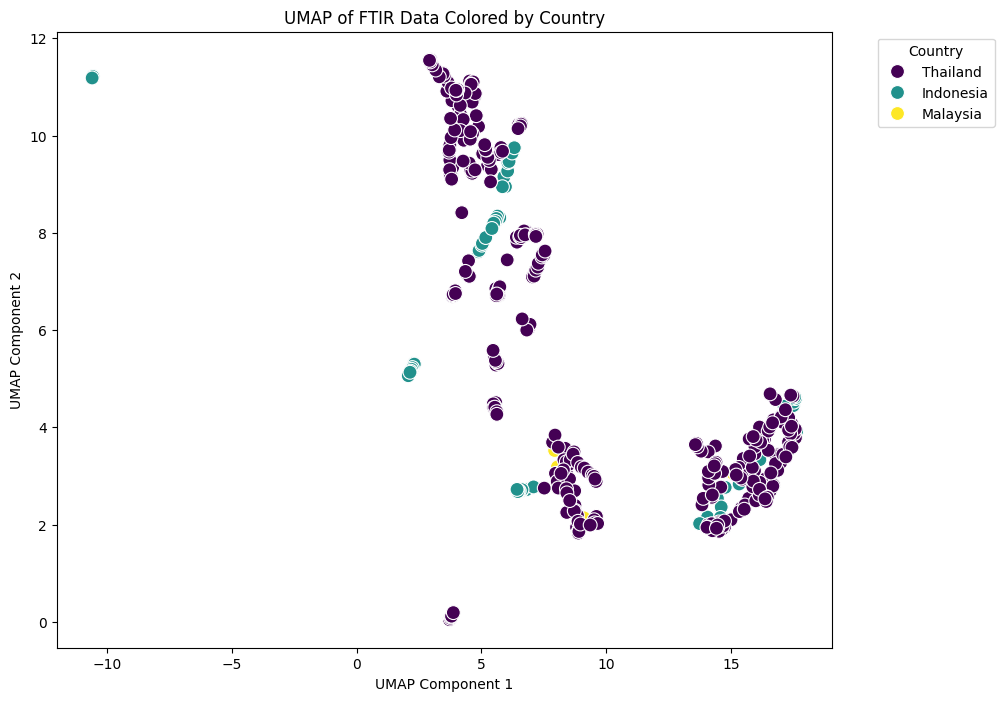

In [27]:
import pandas as pd
from sklearn.preprocessing import RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import umap

# Function to preprocess the data
def preprocess_data(df):
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Log transform the data to reduce skewness
    df_log_transformed = np.log1p(df_imputed)
    
    # Scale the data using RobustScaler
    scaler = RobustScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_log_transformed), columns=df.columns)
    
    return df_scaled

# Function to remove outliers
def remove_outliers(df):
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(df)
    mask = yhat != -1
    df_cleaned = df[mask]
    return df_cleaned

# Preprocess the data
ftir_data_rt4_preprocessed = preprocess_data(ftir_data_rt4_cleaned)

# Remove outliers
ftir_data_rt4_no_outliers = remove_outliers(ftir_data_rt4_preprocessed)

# Apply UMAP on preprocessed data
umap_model = umap.UMAP(n_neighbors=15, min_dist=0.1, n_components=2, random_state=42)
umap_result = umap_model.fit_transform(ftir_data_rt4_no_outliers)

# Create a DataFrame with UMAP components
umap_df = pd.DataFrame(data=umap_result, columns=['UMAP1', 'UMAP2'])

# Assuming the datasets are loaded or already available in the environment
# data_rt4_with_thai = pd.read_csv('path/to/your/data_rt4_with_thai.csv')

# Merge the UMAP components DataFrame with the country information
merged_umap_df = pd.concat([umap_df.reset_index(drop=True), data_rt4_with_thai[['country_code', 'country_name']].reset_index(drop=True)], axis=1)

# Save the UMAP results
#merged_umap_df.to_csv('path/to/your/umap_components_with_country.csv', index=False)

# Plot the UMAP results with colors based on country_code
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_umap_df, x='UMAP1', y='UMAP2', hue='country_code', palette='viridis', s=100)

# Customize the legend to show country names instead of codes
handles, labels = plt.gca().get_legend_handles_labels()
country_code_to_name = dict(zip(merged_umap_df['country_code'], merged_umap_df['country_name']))
updated_labels = [country_code_to_name[int(label)] if label.isdigit() else label for label in labels]
plt.legend(handles, updated_labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.title('UMAP of FTIR Data Colored by Country')
plt.show()


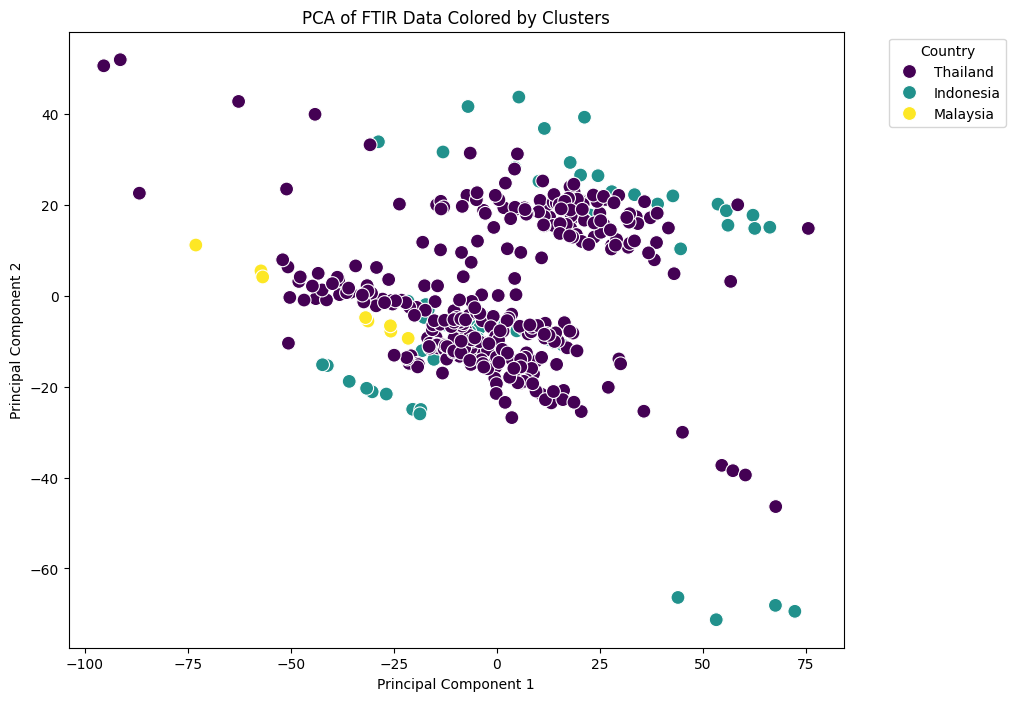

Explained Variance Ratio: [0.48774083 0.23168882]


In [65]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess the data
def preprocess_data(df):
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Log transform the data to reduce skewness
    df_log_transformed = np.log1p(df_imputed)
    
    # Scale the data using StandardScaler
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_log_transformed), columns=df.columns)
    
    return df_scaled

# Function to remove outliers
def remove_outliers(df):
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(df)
    mask = yhat != -1
    df_cleaned = df[mask]
    return df_cleaned

# Preprocess the data
ftir_data_rt4_preprocessed = preprocess_data(ftir_data_rt4_cleaned)

# Remove outliers
ftir_data_rt4_no_outliers = remove_outliers(ftir_data_rt4_preprocessed)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(ftir_data_rt4_no_outliers)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Assuming the datasets are loaded or already available in the environment
# data_rt4_with_thai = pd.read_csv('path/to/your/data_rt4_with_thai.csv')

# Merge the PCA components DataFrame with the country information
merged_pca_df = pd.concat([pca_df.reset_index(drop=True), data_rt4_with_thai[['country_code', 'country_name']].reset_index(drop=True)], axis=1)

# Save the PCA results
# merged_pca_df.to_csv('path/to/your/pca_components_with_country.csv', index=False)

# Plot the PCA results with colors based on clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_pca_df, x='PC1', y='PC2', hue='country_code', palette='viridis', s=100)

# Customize the legend to show country names instead of codes
handles, labels = plt.gca().get_legend_handles_labels()
country_code_to_name = dict(zip(merged_pca_df['country_code'], merged_pca_df['country_name']))
updated_labels = [country_code_to_name[int(label)] if label.isdigit() else label for label in labels]
plt.legend(handles, updated_labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data Colored by Clusters')
plt.show()

# Optional: Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


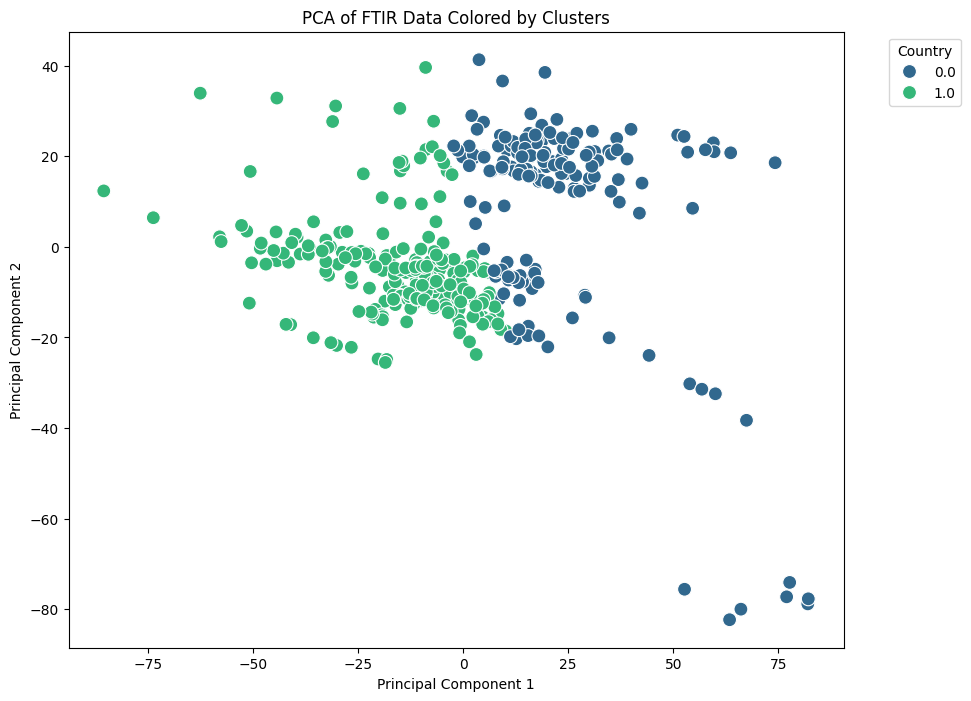

Explained Variance Ratio: [0.47118211 0.24758951]


In [39]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess the data
def preprocess_data(df):
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Log transform the data to reduce skewness
    df_log_transformed = np.log1p(df_imputed)
    
    # Scale the data using StandardScaler
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_log_transformed), columns=df.columns)
    
    return df_scaled

# Function to remove outliers
def remove_outliers(df):
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(df)
    mask = yhat != -1
    df_cleaned = df[mask]
    return df_cleaned

# Preprocess the data
ftir_data_rt4_preprocessed = preprocess_data(ftir_data_rt4_cleaned)

# Remove outliers
ftir_data_rt4_no_outliers = remove_outliers(ftir_data_rt4_preprocessed)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(ftir_data_rt4_no_outliers)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Assuming the datasets are loaded or already available in the environment
# data_rt4_with_thai = pd.read_csv('path/to/your/data_rt4_with_thai.csv')

# Merge the PCA components DataFrame with the country information
merged_pca_df = pd.concat([pca_df.reset_index(drop=True), data_rt4_with_thai[['country_code', 'country_name']].reset_index(drop=True)], axis=1)

# Save the PCA results
# merged_pca_df.to_csv('path/to/your/pca_components_with_country.csv', index=False)

# Plot the PCA results with colors based on clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)

# Customize the legend to show country names instead of codes
handles, labels = plt.gca().get_legend_handles_labels()
country_code_to_name = dict(zip(merged_pca_df['country_code'], merged_pca_df['country_name']))
updated_labels = [country_code_to_name[int(label)] if label.isdigit() else label for label in labels]
plt.legend(handles, updated_labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data Colored by Clusters')
plt.show()

# Optional: Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


In [ ]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to preprocess the data
def preprocess_data(df):
    # Impute missing values
    imputer = SimpleImputer(strategy='mean')
    df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)
    
    # Log transform the data to reduce skewness
    df_log_transformed = np.log1p(df_imputed)
    
    # Scale the data using StandardScaler
    scaler = StandardScaler()
    df_scaled = pd.DataFrame(scaler.fit_transform(df_log_transformed), columns=df.columns)
    
    return df_scaled

# Function to remove outliers
def remove_outliers(df):
    iso = IsolationForest(contamination=0.05)
    yhat = iso.fit_predict(df)
    mask = yhat != -1
    df_cleaned = df[mask]
    return df_cleaned

# Preprocess the data
ftir_data_rt4_preprocessed = preprocess_data(ftir_data_rt4_cleaned)

# Remove outliers
ftir_data_rt4_no_outliers = remove_outliers(ftir_data_rt4_preprocessed)

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(ftir_data_rt4_no_outliers)

# Perform KMeans clustering
kmeans = KMeans(n_clusters=2, random_state=42)
clusters = kmeans.fit_predict(pca_result)

# Create a DataFrame with PCA components and cluster labels
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['Cluster'] = clusters

# Assuming the datasets are loaded or already available in the environment
# data_rt4_with_thai = pd.read_csv('path/to/your/data_rt4_with_thai.csv')

# Merge the PCA components DataFrame with the country information
merged_pca_df = pd.concat([pca_df.reset_index(drop=True), data_rt4_with_thai[['country_code', 'country_name']].reset_index(drop=True)], axis=1)

# Save the PCA results
# merged_pca_df.to_csv('path/to/your/pca_components_with_country.csv', index=False)

# Plot the PCA results with colors based on clusters
plt.figure(figsize=(10, 8))
sns.scatterplot(data=merged_pca_df, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)

# Customize the legend to show country names instead of codes
handles, labels = plt.gca().get_legend_handles_labels()
country_code_to_name = dict(zip(merged_pca_df['country_code'], merged_pca_df['country_name']))
updated_labels = [country_code_to_name[int(label)] if label.isdigit() else label for label in labels]
plt.legend(handles, updated_labels, title='Country', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of FTIR Data Colored by Clusters')
plt.show()

# Optional: Print explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)


In [ ]:
# Second removal: ranges between 822.01 to 879.99
ranges_2 = [
    (822.01, 879.99)
]


# Identify columns to drop based on the specified ranges
columns_to_drop_2 = [col for col in ftir_data_rt4_cleaned.columns if column_in_ranges(col, ranges_2)]

# Drop the identified columns
ftir_data_rt4_cleaned_2nd = ftir_data_rt4_cleaned.drop(columns=columns_to_drop_2)

print(ftir_data_rt4_cleaned_2nd.head())

   649.893   650.376   650.858   651.340   651.822   652.304   652.786   \
0  0.016094  0.016946  0.017469  0.017538  0.017089  0.016154  0.014849   
1  0.013664  0.013097  0.012600  0.012208  0.011938  0.011801  0.011799   
2  0.015954  0.016134  0.015986  0.015469  0.014614  0.013532  0.012372   
3  0.013254  0.012653  0.011752  0.010722  0.009749  0.008982  0.008484   
4  0.014003  0.013402  0.012824  0.012274  0.011728  0.011171  0.010621   

   653.268   653.750   654.232   ...  3095.189  3095.671  3096.154  3096.636  \
0  0.013370  0.011951  0.010798  ...  0.002089  0.002042  0.002030  0.002054   
1  0.011914  0.012086  0.012223  ...  0.002490  0.002526  0.002579  0.002646   
2  0.011307  0.010487  0.010014  ...  0.001440  0.001451  0.001487  0.001537   
3  0.008240  0.008177  0.008214  ...  0.003409  0.003488  0.003543  0.003569   
4  0.010143  0.009831  0.009767  ...  0.002296  0.002352  0.002439  0.002539   

   3097.118  3097.600  3098.082  3098.564  3099.046  3099.528  
0  0